# Survival analysis

This notebook presents example usage of package for solving survival problem on `bmt` dataset. You can download dataset [here](https://raw.githubusercontent.com/adaa-polsl/RuleKit/master/data/bmt/bmt.arff) 

This tutorial will cover topics such as:    
- training model   
- changing model hyperparameters   
- hyperparameters tuning   
- calculating metrics for model    
- getting RuleKit inbuilt   

## Summary of the dataset

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datasets_path = "" 

file_name = 'bmt.arff'

data_df = pd.DataFrame(arff.loadarff(open(datasets_path + file_name, 'r', encoding="cp1252"))[0])

# code to fix the problem with encoding of the file
tmp_df = data_df.select_dtypes([object]) 
tmp_df = tmp_df.stack().str.decode("cp1252").unstack()
for col in tmp_df:
    data_df[col] = tmp_df[col]
    
data_df = data_df.replace({'?': None})

In [2]:
data_df

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,...,1,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,-1,-1,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,-1,-1,1,0,...,1,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,1,2,1,1,...,None,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,0,1,33.358904,0,0,0,1,2,0,1,...,1,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1,0,0,...,1,11.08,2.522750,4.39,44.0,15.0,22.0,16.0,385.0,1.0
183,0,1,22.895890,0,0,0,1,0,1,1,...,1,4.64,1.038858,4.47,44.5,12.0,30.0,1000000.0,634.0,1.0
184,0,1,27.347945,0,1,0,1,-1,1,1,...,1,7.73,1.635559,4.73,33.0,16.0,16.0,1000000.0,1895.0,0.0
185,1,1,27.780822,0,1,0,1,0,1,1,...,0,15.41,8.077770,1.91,24.0,13.0,14.0,54.0,382.0,1.0


In [3]:
print("Dataset overview:")
print(f"Name: {file_name}")
print(f"Objects number: {data_df.shape[0]}; Attributes number: {data_df.shape[1]}")
print("Basic attribute statistics:")
data_df.describe()

Dataset overview:
Name: bmt.arff
Objects number: 187; Attributes number: 37
Basic attribute statistics:


,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,182.000000,182.000000,185.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,11.891781,5.385096,4.745714,35.801081,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,8.271826,5.305639,9.914386,9.598716,3.859128,19.650922,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,27.039726,5.050000,5.350000,1.786683,1.687500,19.000000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,33.550685,9.600000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,40.117809,14.050000,15.415000,5.823565,6.785000,50.600000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


### Survival curve for the entire set (Kaplan Meier curve)

<Axes: xlabel='timeline'>

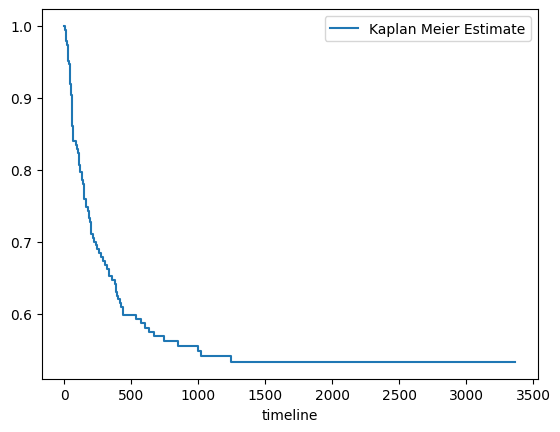

In [4]:
from lifelines import KaplanMeierFitter

# create a kmf object
kmf = KaplanMeierFitter() 

# Fit the data into the model
kmf.fit(data_df['survival_time'], data_df['survival_status'],label='Kaplan Meier Estimate')

# Create an estimate
kmf.plot(ci_show=False) 

## Import RuleKit

In [5]:
from rulekit.survival import SurvivalRules
from rulekit.params import Measures

## Helper function for creating ruleset characteristics dataframe

In [6]:
def get_ruleset_stats(model) -> pd.DataFrame:
    tmp = model.parameters.__dict__
    del tmp['_java_object']
    return pd.DataFrame.from_records([{**tmp, **model.stats.__dict__}])

## Rule induction on full dataset

In [7]:
X = data_df.drop(['survival_status'], axis=1)
y = data_df['survival_status']

In [8]:
srv = SurvivalRules(
    survival_time_attr = 'survival_time'
)
srv.fit(X, y)
ruleset = srv.model
predictions  = srv.predict(X)

ruleset_stats = get_ruleset_stats(ruleset)

display(ruleset_stats)

,minimum_covered,maximum_uncovered_fraction,ignore_missing,pruning_enabled,max_growing_condition,time_total_s,time_growing_s,time_pruning_s,rules_count,conditions_per_rule,induced_conditions_per_rule,avg_rule_coverage,avg_rule_precision,avg_rule_quality,pvalue,FDR_pvalue,FWER_pvalue,fraction_significant,fraction_FDR_significant,fraction_FWER_significant
0,5.0,0.0,False,True,0.0,2.245832,1.209875,1.013907,5,2.4,72.4,0.407487,1.0,0.999742,0.000258,0.00029,0.000384,1.0,1.0,1.0


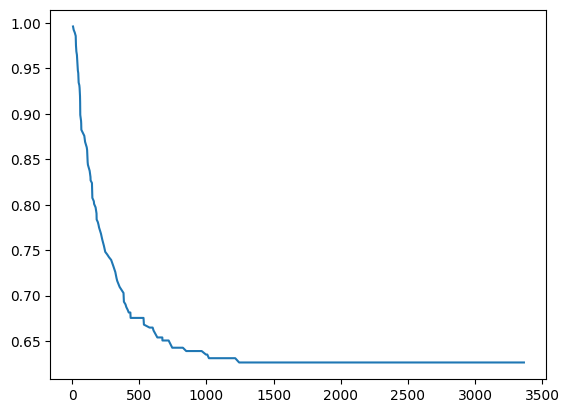

In [9]:
plt.plot(predictions[0]["times"], predictions[0]["probabilities"])

### Generated rules

In [10]:
for rule in ruleset.rules:
    print(rule)

IF Relapse = {0} AND Donorage = (-inf, 45.16) AND Recipientage = (-inf, 17.45) THEN 
IF HLAmismatch = {0} AND Donorage = <33.34, 42.14) AND Gendermatch = {0} AND RecipientRh = {1} AND Recipientage = <3.30, inf) THEN 
IF Relapse = {1} AND PLTrecovery = <15.50, inf) THEN 
IF PLTrecovery = (-inf, 266) THEN 
IF PLTrecovery = <266, inf) THEN 


### Rules evaluation on full set

In [11]:
integrated_brier_score = srv.score(X, y)
print(f'Integrated Brier Score: {integrated_brier_score}')

Integrated Brier Score: 0.19431881630173065


## Stratified K-Folds cross-validation

In [12]:
from sklearn.model_selection import StratifiedKFold
from rulekit.exceptions import RuleKitJavaException
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

ruleset_stats = pd.DataFrame()
survival_metrics = []


for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    srv = SurvivalRules(
        survival_time_attr = 'survival_time'
    )
    try:
        srv.fit(x_train, y_train)
    except Exception as e:
        e = RuleKitJavaException(e)
        print(e.print_java_stack_trace())
    ruleset = srv.model

    ibs = srv.score(x_test, y_test)

    survival_metrics.append(ibs)
    ruleset_stats = pd.concat([ruleset_stats, get_ruleset_stats(ruleset)])


Ruleset characteristics (average)

In [13]:
display(ruleset_stats.mean())

minimum_covered                 5.000000
maximum_uncovered_fraction      0.000000
ignore_missing                  0.000000
pruning_enabled                 1.000000
max_growing_condition           0.000000
time_total_s                    1.273897
time_growing_s                  0.482035
time_pruning_s                  0.790854
rules_count                     5.100000
conditions_per_rule             2.535119
induced_conditions_per_rule    69.852381
avg_rule_coverage               0.438761
avg_rule_precision              1.000000
avg_rule_quality                0.992375
pvalue                          0.007625
FDR_pvalue                      0.007751
FWER_pvalue                     0.008209
fraction_significant            0.948214
fraction_FDR_significant        0.948214
fraction_FWER_significant       0.948214
dtype: float64

Rules evaluation on dataset (average)

In [14]:
print(f'Integrated Brier Score: {np.mean(survival_metrics)}')

Integrated Brier Score: 0.2057312271821908


## Hyperparameters tuning

This one gonna take a while...

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from rulekit.params import Measures

In [16]:
def scorer(estimator, X, y):
    return (-1 * estimator.score(X,y))

In [17]:
# define models and parameters
model = SurvivalRules()

# define grid search
grid = {
    'survival_time_attr': ['survival_time'],
    'minsupp_new': range(3, 10),
}

cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring=scorer) 
grid_result = grid_search.fit(X, y)

# summarize results
print("Best Integrated Brier Score: %f using %s" % ( (-1)*grid_result.best_score_, grid_result.best_params_))

Best Integrated Brier Score: 0.214374 using {'minsupp_new': 3, 'survival_time_attr': 'survival_time'}


## Building model with tuned hyperparameters

### Split dataset to train and test (80%/20%)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

srv = SurvivalRules(
    survival_time_attr='survival_time',
    minsupp_new=5
)
srv.fit(X_train, y_train)
ruleset = srv.model
ruleset_stats = get_ruleset_stats(ruleset)

Rules evaluation

In [19]:
display(ruleset_stats.iloc[0])

minimum_covered                     5.0
maximum_uncovered_fraction          0.0
ignore_missing                    False
pruning_enabled                    True
max_growing_condition               0.0
time_total_s                   0.625197
time_growing_s                 0.259452
time_pruning_s                 0.364996
rules_count                           5
conditions_per_rule                 3.2
induced_conditions_per_rule        61.0
avg_rule_coverage              0.430872
avg_rule_precision                  1.0
avg_rule_quality               0.999995
pvalue                         0.000005
FDR_pvalue                     0.000005
FWER_pvalue                    0.000005
fraction_significant                1.0
fraction_FDR_significant            1.0
fraction_FWER_significant           1.0
Name: 0, dtype: object

### Validate model on test dataset

In [20]:
integrated_brier_score = srv.score(X_test, y_test)
print(f'Integrated Brier Score: {integrated_brier_score}')

Integrated Brier Score: 0.22981693833242725


In [21]:
predictions = srv.predict(X_test)

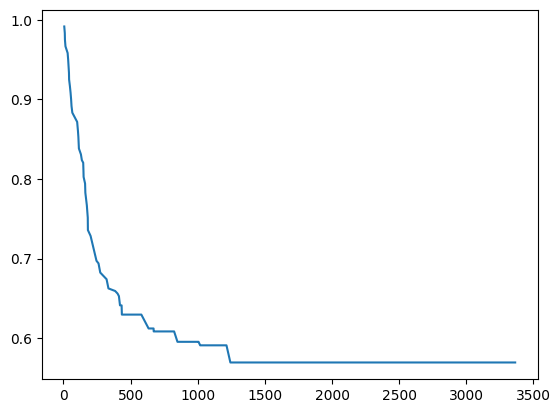

In [22]:
plt.plot(predictions[0]["times"], predictions[0]["probabilities"])